# Deep Learning

In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential

## Load the data

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
#Let's start by loading the dataset.
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Explore the data

In [3]:
#The training set contains 60,000 color images, each 32x32x3 pixels:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape[0]

50000

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
#Each pixel intensity is represented as a byte (0 to 255):
x_train.dtype

dtype('uint8')

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
x_test.dtype

dtype('uint8')

## Preprocess the data

Each image is mapped to a single label.

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

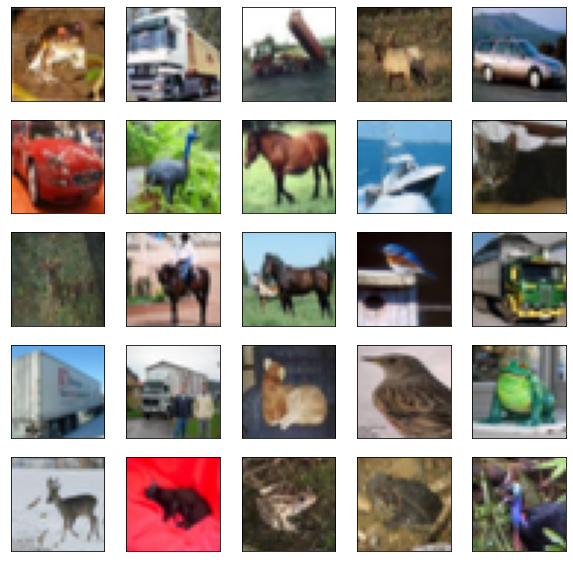

In [10]:
#Let's take a look at a sample of the images in the dataset:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]], color='white')
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [11]:
# Normalize pixel values to be between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

## Model 1: Simple model

In [12]:
#Construct the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.layers

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [16]:
#Train the model
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8696 - accuracy: 0.3268
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6827 - accuracy: 0.3962
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6061 - accuracy: 0.4257
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5548 - accuracy: 0.4437
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5192 - accuracy: 0.4564
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4921 - accuracy: 0.4648
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4705 - accuracy: 0.4719
Epoch 8/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4458 - accuracy: 0.4842
Epoch 9/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4316 - accuracy: 0.4894
Epoch 10/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.411

In [17]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 1563}

In [18]:
#Evaluate accuracy
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 - 1s - loss: 1.4394 - accuracy: 0.4874 - 516ms/epoch - 2ms/step

Test accuracy: 0.48739999532699585

Test loss: 1.4393678903579712


313/313 - 0s - loss: 1.4394 - accuracy: 0.4874 - 426ms/epoch - 1ms/step


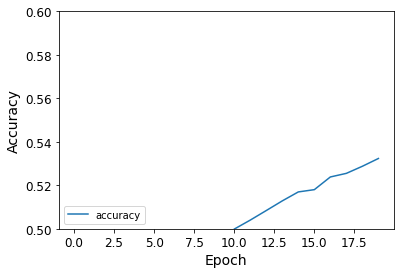

In [19]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 0.60])
plt.legend(loc='lower left')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [20]:
#Make predictions
#Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(x_test)

In [21]:
i = 30
prediction1 = np.argmax(predictions[i])
real_label1 = y_test[i]
print(f'Predicion: {prediction1}')
print(f'Real label: {real_label1}')

Predicion: 6
Real label: [6]


In [22]:
class_names[6]

'frog'

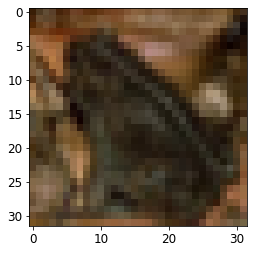

In [37]:
plt.imshow(x_test[30])

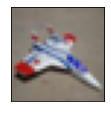

In [24]:
#Verify predictions
plt.figure(figsize=(10,10))
plt.subplot(5,5,25)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(x_train[i])

plt.xlabel(class_names[y_train[i][0]], color='white')
plt.show()

In [25]:
# Use the trained model
# Grab an image from the test dataset.
img = x_test[50]
print(img.shape)

(32, 32, 3)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 32, 32, 3)


In [27]:
#Now predict the correct label for this image:
predictions_single = probability_model.predict(img)
np.argmax(predictions_single[0])

9

In [28]:
class_names[9]

'truck'

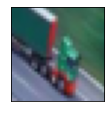

In [29]:
i = 50

plt.figure(figsize=(10,10))
plt.subplot(5,5,25)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(x_train[i])

plt.xlabel(class_names[y_train[i][0]], color='white')
plt.show()

## Model 2: Convolutional Neural Network (CNN)

In [30]:
# Create the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [32]:
# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.5225 - accuracy: 0.4459 - val_loss: 1.2402 - val_accuracy: 0.5551
Epoch 2/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1581 - accuracy: 0.5872 - val_loss: 1.1227 - val_accuracy: 0.6043
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0169 - accuracy: 0.6422 - val_loss: 0.9858 - val_accuracy: 0.6559
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9213 - accuracy: 0.6767 - val_loss: 0.9616 - val_accuracy: 0.6645
Epoch 5/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8440 - accuracy: 0.7042 - val_loss: 0.8937 - val_accuracy: 0.6940
Epoch 6/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7878 - accuracy: 0.7235 - val_loss: 0.8864 - val_accuracy: 0.6904
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7393 - accuracy: 0.7398 - val_loss: 0.8772 -

313/313 - 1s - loss: 0.8628 - accuracy: 0.7105 - 1s/epoch - 4ms/step


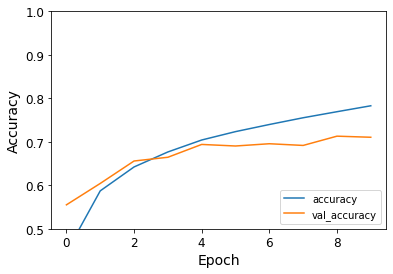


Test accuracy: 0.7105000019073486

Test loss: 0.8627923727035522


In [33]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
plt.show()

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

In [34]:
#Make predictions
#Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(x_test)

In [35]:
i = 20
prediction1 = np.argmax(predictions[i])
real_label1 = y_test[i]
print(f'Predicion: {prediction1}')
print(f'Real label: {real_label1}')

Predicion: 7
Real label: [7]


In [38]:
class_names[7]

'horse'

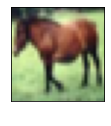

In [39]:
#Verify predictions
plt.figure(figsize=(10,10))
for i in real_label1:
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]], color='white')
plt.show()